# 

---

### Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification and regression tasks. It works by finding the optimal hyperplane (or decision boundary) that best separates the data into different classes or predicts continuous values. The key concept behind SVM is to maximize the margin between classes, which is defined as the distance between the decision boundary and the nearest data points from each class. These nearest points are called support vectors, and they determine the position and orientation of the hyperplane.

SVM can handle both linearly separable and non-linearly separable data. For linearly separable data, the algorithm finds a straight-line hyperplane that best separates the classes. However, for non-linearly separable data, SVM uses a technique called the kernel trick. The kernel trick involves transforming the input data into a higher-dimensional space where it becomes linearly separable, allowing the SVM to find the optimal separating hyperplane.

Here's a step-by-step overview of how SVM works:

Choose a kernel function: Select an appropriate kernel function (e.g., linear, polynomial, or radial basis function) based on the data's nature and the problem requirements. This function will be used to map the data into a higher-dimensional space if necessary.
Transform the data: If using a non-linear kernel, apply the chosen kernel function to transform the input data into a higher-dimensional space.
Determine the optimal hyperplane: Find the hyperplane that best separates the classes by maximizing the margin between them. This is achieved by minimizing a cost function that considers both the margin size and the classification error.
Identify support vectors: Find the data points that lie closest to the decision boundary, as they are critical in defining the optimal hyperplane.
Make predictions: For a new input data point, use the kernel function and the support vectors to determine which side of the decision boundary it lies on (for classification) or predict the continuous value (for regression).
SVM is known for its effectiveness in high-dimensional spaces and robustness against overfitting, making it suitable for various applications, including image classification, text categorization, and bioinformatics.

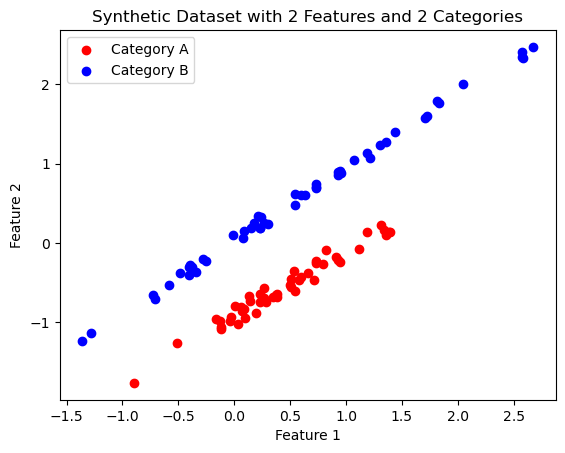

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a synthetic dataset with 2 features and 2 classes
n_samples = 100
n_features = 2
n_classes = 2

X, y = make_classification(n_samples=n_samples, n_features=n_features, 
                           n_classes=n_classes, n_redundant=0, 
                           n_clusters_per_class=1, class_sep = 0.5, 
                           random_state=42)

# Separate the data into categories A and B
category_A = X[y == 0]
category_B = X[y == 1]

# Visualize the data
plt.scatter(category_A[:, 0], category_A[:, 1], c='r', label='Category A')
plt.scatter(category_B[:, 0], category_B[:, 1], c='b', label='Category B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Dataset with 2 Features and 2 Categories')
plt.show()


Full meal deal.

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[13  0]
 [ 0  7]]


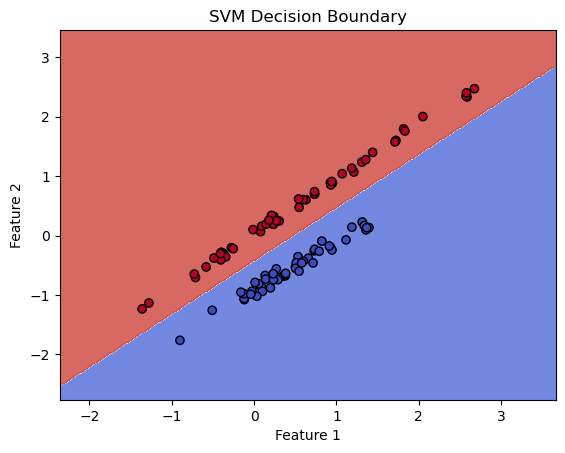

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Decision Boundary')
plt.show()


You can experiment with different kernel functions (e.g., 'poly', 'rbf', 'sigmoid') and other hyperparameters to see how they affect the SVM's performance.

---

## Dimesion reduction

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning, statistics, and data analysis to transform a high-dimensional dataset into a lower-dimensional space while retaining as much information as possible. The primary goal of PCA is to identify and project the data onto the most significant directions (principal components) in the feature space, where the variance of the data is maximized.

Here's a brief explanation of PCA:

Standardization: The first step is to standardize the dataset by scaling each feature to have a mean of 0 and a standard deviation of 1. This ensures that all features have equal importance in the analysis and prevents larger-scale features from dominating the results.

Covariance Matrix: PCA computes the covariance matrix of the standardized dataset, which captures the linear relationships between the features. The covariance matrix helps determine the directions in which the variance of the data is maximized.

Eigenvalues and Eigenvectors: The next step is to compute the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent the directions of the principal components, while eigenvalues represent the magnitude of the variance along each principal component. The eigenvector corresponding to the largest eigenvalue represents the direction with the highest variance, and so on.

Projection onto Principal Components: Finally, the original dataset is projected onto the principal components (eigenvectors) to obtain the transformed data in the reduced-dimensional space. The number of principal components retained is typically determined by the desired level of variance preservation or the specific problem requirements.

PCA has numerous applications, such as data visualization, noise reduction, feature extraction, and improving the efficiency of other machine learning models by reducing the input dimensionality. However, it's essential to note that PCA assumes linear relationships among the features and may not be the best choice for datasets with complex, non-linear relationships.

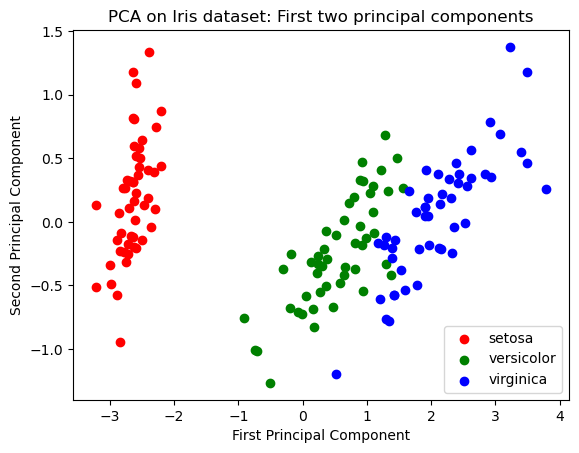

Confusion Matrix:
[[19  0  0]
 [ 0  9  4]
 [ 0  1 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.69      0.78        13
           2       0.75      0.92      0.83        13

    accuracy                           0.89        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.90      0.89      0.89        45

Accuracy Score: 88.89%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA on the Iris dataset, keeping only the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of the first two principal components with color coding for species
colors = ['red', 'green', 'blue']
species = iris.target_names

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=target_name)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("PCA on Iris dataset: First two principal components")
plt.show()

# Split the PCA-transformed data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a Naive Bayes classifier and train it on the PCA-transformed training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the PCA-transformed testing data
y_pred = gnb.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")


---

## Gaussian Naive Bayes

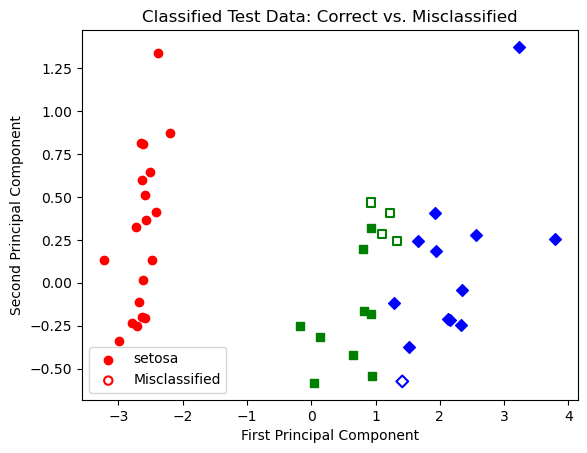

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA on the Iris dataset, keeping only the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the PCA-transformed data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a Naive Bayes classifier and train it on the PCA-transformed training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the PCA-transformed testing data
y_pred = gnb.predict(X_test)

# Scatter plot of the classified test data with mistakes as open symbols
colors = ['red', 'green', 'blue']
species = iris.target_names
markers = ['o', 's', 'D']  # Different marker shapes for each class
labels = ['Correct', 'Misclassified']

# Plot the correctly classified points as filled symbols
for i, color, target_name, marker in zip(range(3), colors, species, markers):
    plt.scatter(X_test[(y_test == y_pred) & (y_test == i), 0], 
                X_test[(y_test == y_pred) & (y_test == i), 1], 
                color=color, marker=marker, label=target_name if i == 0 else None)

# Plot the misclassified points as open symbols
for i, color, marker in zip(range(3), colors, markers):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i), 0], X_test[(y_test != y_pred) & (y_test == i), 1], color=color, marker=marker, facecolors='none', linewidths=1.5, edgecolors=color, label=labels[1] if i == 0 else None)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("Classified Test Data: Correct vs. Misclassified")
plt.show()
